<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/generative-models/Image_Generation_with_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

# Image Generation with Sable Diffusion

[Stable Diffusion](https://en.wikipedia.org/wiki/Stable_Diffusion) is a deep learning model developed by Stability AI that generates detailed images based on textual descriptions. Released in 2022, it utilizes diffusion techniques to create high-quality, photorealistic images from text prompts.

##Key Features

* Text-to-Image Generation: Transforms textual prompts into corresponding images, enabling users to visualize concepts described in words.

* Open-Source Availability: Unlike some proprietary models, Stable Diffusion's code and model weights are publicly accessible, allowing for community-driven development and customization.

* Versatility: Beyond generating images from text, it supports tasks like inpainting (filling in missing parts of an image), outpainting (extending images beyond their original borders), and image-to-image translations guided by text prompts.

## Diffusion Models
Diffusion models, such as DDPM and DDIM, generate data by adding noise step-by-step during a forward process and then learning to reverse this noise in a backward process to recover the original data. They are particularly effective in generating realistic images, but they can be slow since thousands of denoising steps are often required.

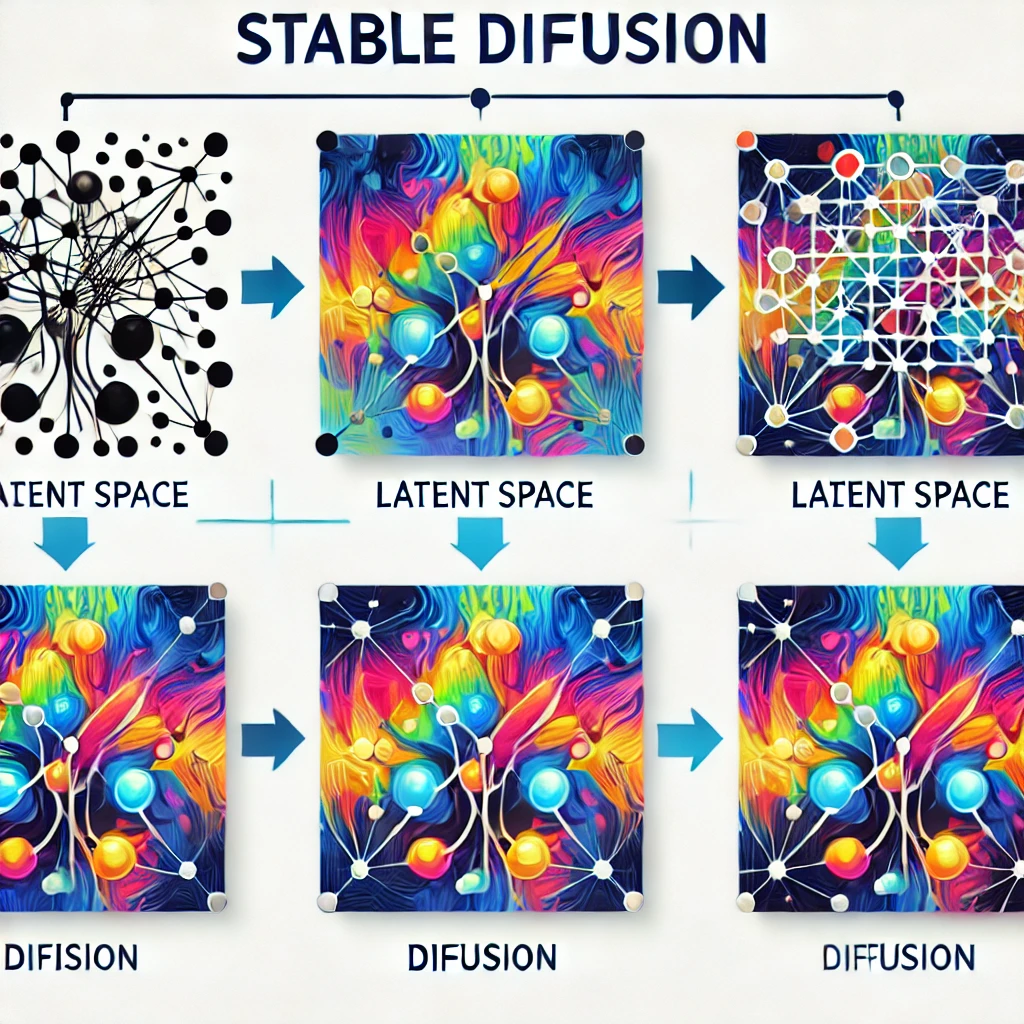

## Latent Diffusion Model (LDM)

The core of Stable Diffusion is a Latent Diffusion Model, where diffusion happens in a latent space rather than directly on pixel data. This is computationally efficient while still generating high-quality outputs.
The diffusion process iteratively denoises latent representations to reach a desired output.


## Two Main Phases
* A. Forward Diffusion Process (Adding Noise)
Similar to DDPM, noise is progressively added to the input during the forward process, resulting in an image that eventually becomes indistinguishable from pure noise after enough steps.
* B. Reverse Denoising Process (Generating Images)
During inference, the model starts with random noise and applies a sequence of denoising steps to reconstruct a high-quality image.
In Stable Diffusion, this denoising is done in the latent space, using a neural network known as the U-Net.

##UNet Architecture

The denoising component of the model is based on a U-Net architecture. This is a type of neural network particularly well-suited for capturing multi-scale information. The U-Net is responsible for reversing the noise process to generate a coherent image.


## Text Encoder
A key part of Stable Diffusion is its use of a text encoder, such as [CLIP](https://github.com/tahamsi/computer-vision/blob/main/week-9/CLIP.ipynb)’s text model, to encode user-provided text prompts into a latent space. These text embeddings are then used as conditioning inputs, which guide the image generation process based on the prompt.



##Scheduler

Stable Diffusion uses a scheduler to guide the denoising process, typically employing a predefined number of steps. Popular schedulers like PNDM (Predictive Noise Diffusion Models) or DDIM (Denoising Diffusion Implicit Models) are used to balance between image quality and speed.


##Autoencoder (VAE)

The model uses an Autoencoder (VAE - Variational Autoencoder) to convert images to latent representations and back. It helps to reduce the dimensionality of images, which makes the diffusion process more efficient.

##Classifier-Free Guidance:

This guidance method is used during image generation to improve the output quality. It combines conditional and unconditional denoising results to guide the generated images more closely towards the desired prompt, giving better control over the strength of conditioning.


##How it Works Together
The process starts by encoding a prompt through the text encoder.
Latent noise is initialized, which the U-Net model iteratively denoises based on the text conditioning.
A scheduler controls the pace of denoising.
The output of the U-Net is passed through the VAE to convert the latent representation into a high-resolution image.

## Before you start

Let's make sure that we have access to `GPU`. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit -> Notebook settings -> Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

## Install dependencies

In [ ]:
!pip install torch torchvision diffusers transformers
from IPython import display
display.clear_output()

## Import Required Libraries

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
display.clear_output()


## Initialize the model

In [ ]:
# Load the pre-trained Stable Diffusion model
# model_id = "CompVis/stable-diffusion-v1-4" # SDv 1
model_id = "stabilityai/stable-diffusion-2-base"

device = "cuda" if torch.cuda.is_available() else "cpu"
# Load the Stable Diffusion v2 model pipeline

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)  # Move the pipeline to GPU for faster generation

# Generate an image based on a text prompt
def generate_image(prompt, output_path="generated_image.png"):
    with torch.autocast(device):
        image = pipe(prompt).images[0]

    # Save the generated image
    image.save(output_path)
    print(f"Image saved to {output_path}")
    return image
display.clear_output()

# Test

Test the model by passing a prompt.

In [ ]:
# Example usage
output_path="generated_image.png"
prompt = "A scenic view of a futuristic cityscape during sunset"
image = generate_image(prompt)

plt.imshow(image)

## Functions in the package
* Core Functions: from_pretrained(), __call__()
* Memory Optimization: enable_attention_slicing(), enable_xformers_memory_efficient_attention(), enable_sequential_cpu_offload()
* Device Management: to()
* Saving and Loading: save_pretrained()
* Safety Management: disable_safety_checker()
* UI Controls: set_progress_bar_config()

## Classes within StableDiffusionPipeline

* UNet2DConditionModel: The denoising model that takes the noisy latent representation and tries to denoise it progressively, guided by the conditioning (the prompt).
* AutoencoderKL (VAE): Used for encoding images into the latent space and decoding latent representations back into images. It helps reduce the computational complexity.
* CLIPTextModel: This text encoder encodes the prompt into embeddings, which condition the denoising process.
* Scheduler (e.g., PNDMScheduler, DDIMScheduler): Guides the denoising process. Different schedulers can be used to balance speed and quality of the generated image.
* SafetyChecker: (Optional) Ensures that generated images are safe and appropriate.
* FeatureExtractor: Sometimes used to preprocess inputs or validate outputs (in cases where extra processing is needed).